In [1]:
!pip install pymatgen
!pip install mp_api
from pymatgen.core.composition import Composition
from pymatgen.core.periodic_table import Element
from pymatgen.core.structure import Structure
import pandas as pd
import numpy as np
import plotly as pt
import seaborn as sns
import requests
import json
import os
import plotly.express as px
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.9/51.9 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.9/119.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 38.9 MB/s eta 0:00:00
  Created wheel for bibtexparser: filename=bibtexparser-1.4.3-py3-none-any.whl size=43549 sha256=27145ef72cee7fcb4fc7ba7362c7d58cfabb4aaa387f2af8f7da9511abe72caf
  Stored in directory: /root/.cache/pip/wheels/1f/7d/e9/1ff2509f13767a55df1279744adfb757f4ab94b2cbe761f56a
Successfully built bibtexparser
   ━━━━━━━━━━━━━━━━━━━

In [4]:
df = pd.read_excel('dataset_ready_to_ML.xlsx')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            300 non-null    int64  
 1   index                                 300 non-null    int64  
 2   avg s valence electrons               300 non-null    float64
 3   avg p valence electrons               300 non-null    float64
 4   avg d valence electrons               300 non-null    float64
 5   avg f valence electrons               300 non-null    float64
 6   frac s valence electrons              300 non-null    float64
 7   frac p valence electrons              300 non-null    float64
 8   frac d valence electrons              300 non-null    float64
 9   frac f valence electrons              300 non-null    float64
 10  MagpieData minimum Electronegativity  300 non-null    float64
 11  MagpieData maximum 

In [6]:
df = df.drop(['index','Unnamed: 0'], axis=1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   avg s valence electrons               300 non-null    float64
 1   avg p valence electrons               300 non-null    float64
 2   avg d valence electrons               300 non-null    float64
 3   avg f valence electrons               300 non-null    float64
 4   frac s valence electrons              300 non-null    float64
 5   frac p valence electrons              300 non-null    float64
 6   frac d valence electrons              300 non-null    float64
 7   frac f valence electrons              300 non-null    float64
 8   MagpieData minimum Electronegativity  300 non-null    float64
 9   MagpieData maximum Electronegativity  300 non-null    int64  
 10  MagpieData range Electronegativity    300 non-null    float64
 11  MagpieData mean Ele

,avg s valence electrons,avg p valence electrons,avg d valence electrons,avg f valence electrons,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,Average Pauling electronegativity,Average Mulliken electronegativity,Valence Electrons Density avg,Oxygen_concentration avg,Packing fraction avg,"Bandgap, eV"
0,0.522727,0.515152,0.153967,0.0,0.465691,0.875796,0.260011,0.0,0.02439,0,0.97561,0.392627,0.392627,0.331697,0.290815,0.290815,0.736527,3.20
1,0.522727,0.515152,0.153967,0.0,0.465691,0.875796,0.260011,0.0,0.02439,0,0.97561,0.392627,0.392627,0.325099,0.483768,0.483768,0.771248,3.35
2,0.522727,0.515152,0.153967,0.0,0.465691,0.875796,0.260011,0.0,0.00000,0,1.00000,0.388495,0.388495,0.314137,0.481698,0.481698,0.818672,3.30
3,0.562500,0.500000,0.140173,0.0,0.490702,0.875796,0.239931,0.0,0.02439,0,0.97561,0.349753,0.349753,0.309096,0.570249,0.570249,0.384262,3.35
4,0.562500,0.500000,0.140173,0.0,0.490702,0.875796,0.239931,0.0,0.02439,0,0.97561,0.349753,0.349753,0.304560,0.550449,0.550449,0.798980,3.50


In [7]:
df.columns

Index(['avg s valence electrons', 'avg p valence electrons',
       'avg d valence electrons', 'avg f valence electrons',
       'frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons',
       'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
       'MagpieData mean Electronegativity',
       'Average Pauling electronegativity',
       'Average Mulliken electronegativity', 'Valence Electrons Density avg',
       'Oxygen_concentration avg', 'Packing fraction avg', 'Bandgap, eV'],
      dtype='object')

In [9]:
columns=['frac s valence electrons', 'frac p valence electrons',
       'frac d valence electrons', 'frac f valence electrons',
       'MagpieData minimum Electronegativity',
       'MagpieData maximum Electronegativity',
       'MagpieData range Electronegativity',
       'MagpieData mean Electronegativity',
       'Average Pauling electronegativity',
       'Average Mulliken electronegativity', 'Valence Electrons Density avg',
       'Oxygen_concentration avg', 'Packing fraction avg', 'Bandgap, eV']
df=df[columns]

In [10]:
target_col = 'Bandgap, eV'
X = df.drop(columns=[target_col])
y = df[target_col]

In [11]:
df[target_col].std()

0.6226070415192774

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#Linear regression


In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 0.48481547439499845
R² Score: -0.2684056648106894


In [16]:
def draw_actual_predicted(y_test, y_pred):
  fig = px.scatter(
    x=y_test,
    y=y_pred,
    labels={'x':'Actual', 'y':'Predicted'},
    title='Actual vs Predicted',
    width = 700,
    height = 500,
  )
  fig.add_shape(
      type="line",
      x0=y_test.min(), y0=y_test.min(),
      x1=y_test.max(), y1=y_test.max(),
      line=dict(color="red", dash="dash")
  )

  fig.show()

In [17]:
draw_actual_predicted(y_test, y_pred)

#DecisionTreeRegressor


In [18]:
from sklearn.tree import DecisionTreeRegressor

In [19]:
tree_model = DecisionTreeRegressor(random_state=42)  # use DecisionTreeClassifier for classification

tree_model.fit(X_train, y_train)

y_pred = tree_model.predict(X_test)

In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2514240740740741
R² Score: 0.34220804271294536


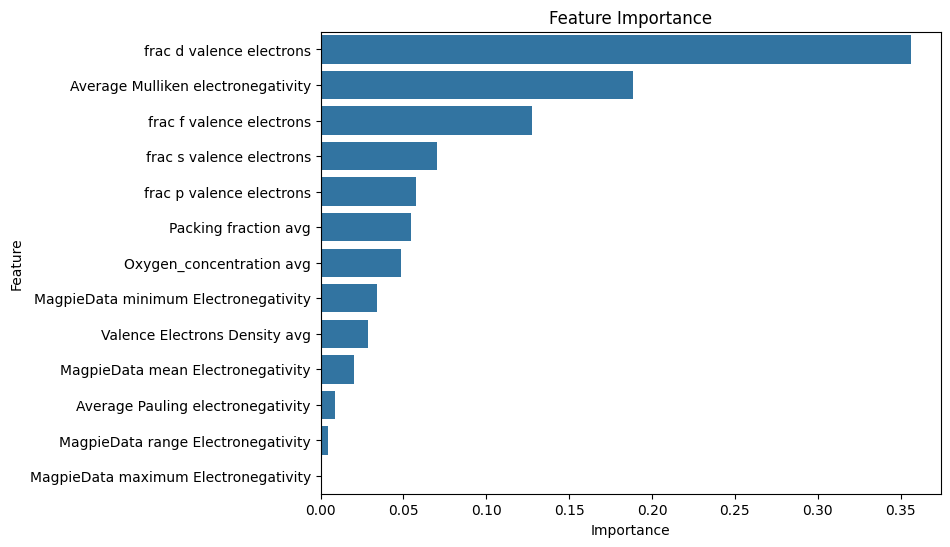

In [21]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()

In [22]:
draw_actual_predicted(y_test, y_pred)

#Random forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
rf_model = RandomForestRegressor(
    n_estimators=100,      # number of trees
    max_depth=3,        # can limit depth to prevent overfitting
    min_samples_split = 5,
    min_samples_leaf = 3,
    max_features=2,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

In [25]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 0.2705111193750052
R² Score: 0.29227127777281814


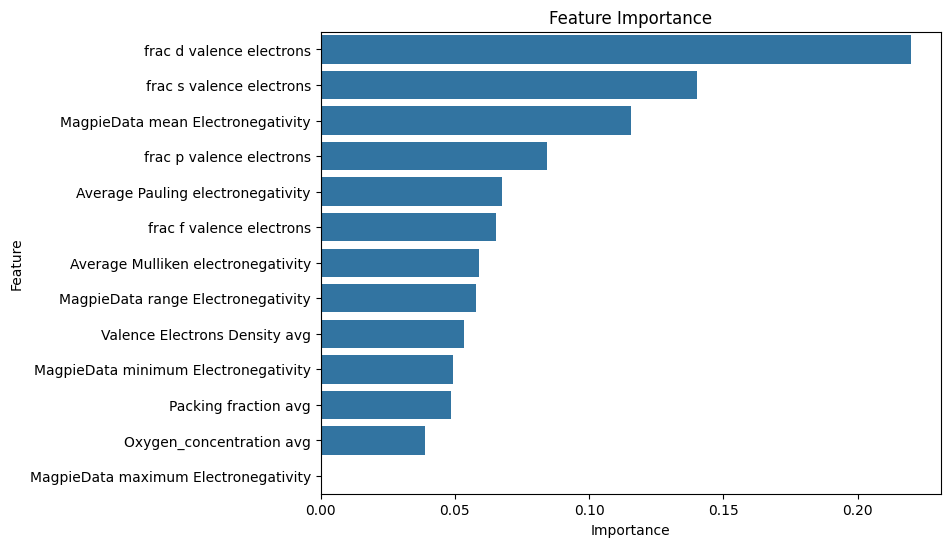

In [26]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()

In [27]:
draw_actual_predicted(y_test, y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 5],
    'max_features': [1, 2, 3]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
draw_actual_predicted(y_test, y_pred)

#GradientBoosting


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=100,      # number of boosting stages
    learning_rate=0.1,     # shrinkage factor
    max_depth=3,           # depth of each tree
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()

In [ ]:
draw_actual_predicted(y_test, y_pred)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],        # number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],   # shrinkage factor
    'max_depth': [2, 3, 4],                # depth of each tree
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 1.0]                # fraction of samples for each tree
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',          # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

In [ ]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
draw_actual_predicted(y_test, y_pred)

#KNeighborsRegression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
draw_actual_predicted(y_test, y_pred)

In [ ]:
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(
    KNeighborsRegressor(),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

# Use best estimator
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

In [ ]:
draw_actual_predicted(y_test, y_pred)